In [24]:
import sympy as sp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import multimode_systems.architecture_optimizer_new as arch_opt
import multimode_systems.constraints as msc
import multimode_systems.symbolic as sym

In [26]:
S_target = sp.Matrix([[0,0],[1,0]])
print('target scattering matrix of an isolator:')
sym.render(S_target)
optimizer = arch_opt.Architecture_Optimizer(
    S_target=sp.Matrix([[0,0],[1,0]]),
    num_auxiliary_modes=1,
)
irreducible_graphs = optimizer.perform_depth_first_search()

target scattering matrix of an isolator:


<IPython.core.display.Math object>

fully connected graph is a valid graph
prepare list of all possible graphs


216it [00:00, 333813.44it/s]


216 graphs identified
start depth-first search
complexity level: 9


100%|██████████| 1/1 [00:00<00:00, 44.53it/s]


complexity level: 8


100%|██████████| 6/6 [00:00<00:00, 90.69it/s]


complexity level: 7


100%|██████████| 15/15 [00:00<00:00, 35.96it/s]


complexity level: 6


100%|██████████| 10/10 [00:00<00:00, 54.04it/s]


complexity level: 5


0it [00:00, ?it/s]


complexity level: 4


0it [00:00, ?it/s]


complexity level: 3


0it [00:00, ?it/s]


complexity level: 2


0it [00:00, ?it/s]


complexity level: 1


0it [00:00, ?it/s]


complexity level: 0


0it [00:00, ?it/s]

optimisation finished, list of irreducible graphs has 3 elements


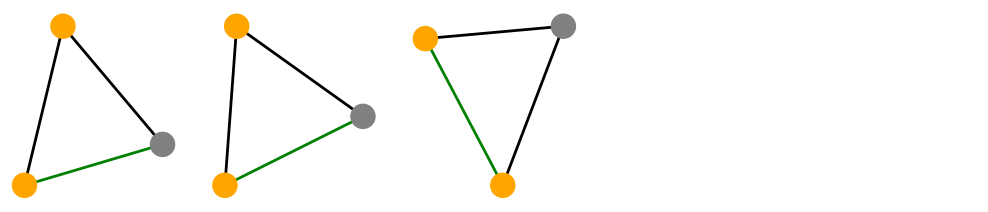

In [27]:
node_colors = ['orange', 'orange', 'gray'] # the port modes are orange, the auxiliary mode gray
msc.plot_list_of_graphs(irreducible_graphs, node_colors=node_colors)